Task 1 Introduction

In this project, I've been approached by the Category Manager for Chips, who wants a better understanding the types of customers who purchase Chips and their purchasing behavior within the region.

The goal of this analysis is to answer key questions such as:

- Examine transaction data: Look for inconsistencies, missing data, outliers, correctly identified category items, and numeric data across all tables.
- Examine customer data: Check for similar issues in customer data, look for nulls and merge data after cleaning.
- Define the Metrics: Total Sales, drivers of sales, where the highest sales are coming from, etc.
- Create charts and note any trends or insights.
- Define recommendation from my insights, determine which segments we should be targeting. If packet sizes are relative and form conclusion about the analysis.

Importing required liraries and datasets

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

pd.set_option('display.max_columns', None)
customer_df = pd.read_csv("Dataset/QVI_purchase_behaviour.csv")
transaction_df = pd.read_excel("Dataset/QVI_transaction_data.xlsx")

Examining the Transaction Dataset

In [4]:
print(transaction_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None


I see that date is in integer format instead of date. Furthermore, I added a year and month column for additional filtering.

In [5]:
transaction_df_cleaned = transaction_df.copy()
transaction_df_cleaned['DATE'] = pd.to_datetime(transaction_df_cleaned['DATE'], origin='1899-12-30', unit='D') # The original value are days since the excel value
transaction_df_cleaned['YEAR'] = pd.to_datetime(transaction_df_cleaned['DATE']).dt.year
transaction_df_cleaned['MONTH'] = pd.to_datetime(transaction_df_cleaned['DATE']).dt.month
transaction_df_cleaned

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018,10
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019,5
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019,5
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018,8
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018,8
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2019,3
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2018,8
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,2018,11
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018,12


Extract the weight for every product for future dollar to weight analysis. Added a product price column to find the price of each item.

In [6]:
transaction_df_cleaned['PROD_PRICE_$'] = transaction_df_cleaned['TOT_SALES']/transaction_df_cleaned['PROD_QTY']
transaction_df_cleaned['PROD_WEIGHT_G'] = transaction_df_cleaned['PROD_NAME'].str.extract(r'(?i)(\d{2,4})g')[0] # The (?i) allows us to ignore capitalization, the rest allows us to extract a number 2 to 4 digits followed by g
transaction_df_cleaned['PROD_WEIGHT_G'] = transaction_df_cleaned['PROD_WEIGHT_G'].str[0:3]
transaction_df_cleaned['PROD_WEIGHT_G'] = transaction_df_cleaned['PROD_WEIGHT_G'].astype(int)
transaction_df_cleaned.sample(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,PROD_PRICE_$,PROD_WEIGHT_G
91884,2019-01-03,160,160142,161009,48,Red Rock Deli Sp Salt & Truffle 150G,2,5.4,2019,1,2.7,150
181042,2018-12-30,191,191039,191994,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6,2018,12,3.8,110
213245,2018-09-12,190,190117,190939,90,Tostitos Smoked Chipotle 175g,2,8.8,2018,9,4.4,175
251328,2019-02-05,172,172032,172941,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,2019,2,3.0,175
171357,2018-07-27,268,268371,264808,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,2018,7,3.9,150
25525,2018-09-17,25,25090,21787,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8,2018,9,5.9,380
184206,2019-03-03,254,254192,254283,74,Tostitos Splash Of Lime 175g,1,4.4,2019,3,4.4,175
59361,2018-10-29,74,74029,72890,80,Natural ChipCo Sea Salt & Vinegr 175g,1,3.0,2018,10,3.0,175
220114,2018-11-18,71,71092,69511,92,WW Crinkle Cut Chicken 175g,2,3.4,2018,11,1.7,175
59338,2018-12-05,72,72358,72183,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6,2018,12,3.8,110


In [7]:
product_words = (
    transaction_df_cleaned['PROD_NAME']
    .dropna()
    .unique()
)
all_words = pd.Series(' '.join(product_words).split())
# Keep only alphabetic words which would exclude 200g, etc.
clean_words = all_words[all_words.str.isalpha()]
word_counts = clean_words.value_counts().reset_index()
word_counts.columns = ['word', 'count']
print(word_counts.head(20))

        word  count
0      Chips     21
1     Smiths     16
2    Crinkle     14
3        Cut     14
4     Kettle     13
5       Salt     12
6     Cheese     12
7   Original     10
8    Doritos      9
9       Chip      9
10     Salsa      9
11      Corn      8
12  Pringles      8
13       RRD      8
14   Chicken      7
15        WW      7
16       Sea      6
17      Sour      6
18    Thinly      5
19    Crisps      5


We only want chip items, and will remove all non chip items. In this case, salsa is the only non chip item

In [8]:
is_salsa = transaction_df_cleaned['PROD_NAME'].str.lower().str.contains('salsa') # Crease a boolean to find out all salsa
transaction_df_cleaned = transaction_df_cleaned[~is_salsa] # filter out all instances of salsa

Use transaction_df_cleaned.describe() to find key mathematical metrics and find potential outliers. The max production quantity seems signifcantly larger, (mean = 1.90) and will be investigated further.

In [9]:
transaction_df_cleaned.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,YEAR,MONTH,PROD_PRICE_$,PROD_WEIGHT_G
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000,246742.000000,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322,2018.495315,6.534972,3.832411,175.585178
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,2018.000000,1.000000,1.320000,70.000000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000,2018.000000,4.000000,3.000000,150.000000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000,2018.000000,7.000000,3.800000,170.000000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000,2019.000000,10.000000,4.600000,175.000000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,2019.000000,12.000000,6.500000,380.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828,0.499979,3.447867,1.077798,59.434727


In [10]:
transaction_df_cleaned.sort_values(by="PROD_QTY", ascending=False).head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,PROD_PRICE_$,PROD_WEIGHT_G
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,2019,5,3.25,380
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,2018,8,3.25,380
135225,2019-05-15,46,46296,42138,81,Pringles Original Crisps 134g,5,18.5,2019,5,3.70,134
69523,2019-05-15,71,71142,69852,96,WW Original Stacked Chips 160g,5,9.5,2019,5,1.90,160
69502,2018-08-18,55,55144,49328,44,Thins Chips Light& Tangy 175g,5,16.5,2018,8,3.30,175
69496,2018-08-15,49,49303,45789,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,2018,8,5.90,380
69486,2019-05-16,45,45006,40460,37,Smiths Thinly Swt Chli&S/Cream175G,5,15.0,2019,5,3.00,175
69483,2018-08-15,43,43126,39445,25,Pringles SourCream Onion 134g,5,18.5,2018,8,3.70,134
69474,2018-08-18,33,33138,30332,68,Pringles Chicken Salt Crips 134g,5,18.5,2018,8,3.70,134
69472,2018-08-17,32,32193,29196,110,WW Original Corn Chips 200g,5,9.5,2018,8,1.90,200


In [11]:
transaction_df_cleaned[transaction_df_cleaned["LYLTY_CARD_NBR"] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,PROD_PRICE_$,PROD_WEIGHT_G
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,2018,8,3.25,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,2019,5,3.25,380


It seems that the customer that made these two large purchases are the same pearson, likely a yearly inventory stock up transactions. This customer will be eliminated to avoid any outlier due to it being an abnormal purchase.

In [12]:
transaction_df_cleaned = transaction_df_cleaned[transaction_df_cleaned["LYLTY_CARD_NBR"] != 226000]
transaction_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246740 entries, 0 to 264835
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246740 non-null  datetime64[ns]
 1   STORE_NBR       246740 non-null  int64         
 2   LYLTY_CARD_NBR  246740 non-null  int64         
 3   TXN_ID          246740 non-null  int64         
 4   PROD_NBR        246740 non-null  int64         
 5   PROD_NAME       246740 non-null  object        
 6   PROD_QTY        246740 non-null  int64         
 7   TOT_SALES       246740 non-null  float64       
 8   YEAR            246740 non-null  int32         
 9   MONTH           246740 non-null  int32         
 10  PROD_PRICE_$    246740 non-null  float64       
 11  PROD_WEIGHT_G   246740 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(5), object(1)
memory usage: 21.6+ MB


In [13]:
print(transaction_df_cleaned.isnull().sum())

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
YEAR              0
MONTH             0
PROD_PRICE_$      0
PROD_WEIGHT_G     0
dtype: int64


In [14]:
len(transaction_df_cleaned["DATE"].unique())

364

There seems to be one day where no transactions are made. That day should still be filled.

In [15]:
all_dates = pd.date_range( # Get all the dates within this period
    start=transaction_df_cleaned['DATE'].min(),
    end=transaction_df_cleaned['DATE'].max(),
    freq='D'
)
daily_sales = transaction_df_cleaned.groupby('DATE')['TOT_SALES'].sum().reset_index() # group the data by date
daily_sales.set_index('DATE', inplace=True)
# Reindex to include all dates in the range
daily_sales = daily_sales.reindex(all_dates)
daily_sales.index.name = 'DATE'
# Fill missing sales with 0
daily_sales['TOT_SALES'] = daily_sales['TOT_SALES'].fillna(0)
daily_sales


,TOT_SALES
DATE,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0
...,...
2019-06-26,4829.7
2019-06-27,4941.3
2019-06-28,4876.6


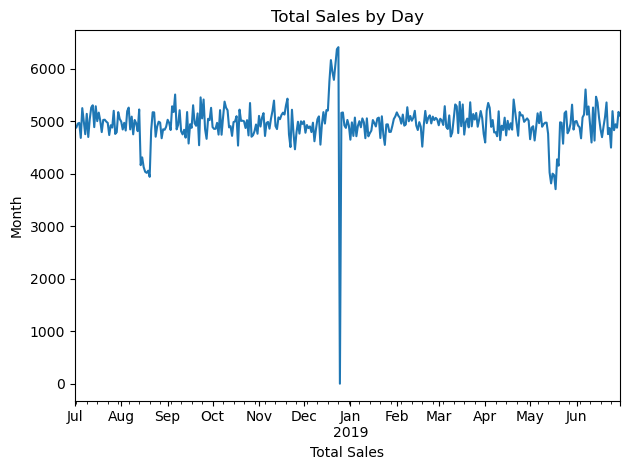

In [16]:
daily_sales.plot(kind='line')
plt.title("Total Sales by Day")
plt.xlabel("Total Sales")
plt.ylabel("Month")
plt.legend().set_visible(False)
plt.tight_layout()
plt.show()

There seems to be a day in late december that had no sales, it was likely due to a holiday where the store was closed.

Examining the Customer Dataset

In [17]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [38]:
print(f'LYLTY_CARD_NBR: {len(customer_df["LYLTY_CARD_NBR"].unique())}')
print(f'LIFESTAGE: {len(customer_df["LIFESTAGE"].unique())}')
print(f'PREMIUM_CUSTOMER: {len(customer_df["PREMIUM_CUSTOMER"].unique())}')

LYLTY_CARD_NBR: 72637
LIFESTAGE: 7
PREMIUM_CUSTOMER: 3


In [27]:
customer_df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [41]:
store_merged_df = customer_df.merge(transaction_df_cleaned)
store_merged_df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,PROD_PRICE_$,PROD_WEIGHT_G
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018,10,3.0,175
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2018,9,2.7,150
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,2019,3,3.6,210
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,2019,3,3.0,175
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,2018,11,1.9,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2370651,MIDAGE SINGLES/COUPLES,Mainstream,2018-08-03,88,240350,4,Dorito Corn Chp Supreme 380g,2,13.0,2018,8,6.5,380
246736,2370701,YOUNG FAMILIES,Mainstream,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,2018,12,3.6,210
246737,2370751,YOUNG FAMILIES,Premium,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,2018,10,4.6,150
246738,2370961,OLDER FAMILIES,Budget,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,2018,10,4.2,165


Defining Metrics

Store Overview Metrics:
- Total Sales: Sum of TOT_SALES, used to show revenue
- Total Transactions: Count of TXN_ID, used to show activity volume
- Sales by Year-Month, used to determine sales over time

Customer demographic Metrics Grouped by Stores:
- Average Sales Per Customer: TOT_SALES / Unique Customers, used to show individual revenue
- Transaction by Lifestage, and Premium Customer: Used to determine shopper identity and who the most valuable customers are

Item Classification Metrics:
- Average Item Per Transactions: COUNT PROD_NAME / TXN_ID, used to show individual volume
- Sales by Weight: Determine which size items are most purchased and sold


Store Overview Analysis:
- Total Sales: Sum of TOT_SALES, used to show revenue
- Total Transactions: Count of TXN_ID, used to show activity volume
- Sales by Year-Month, used to determine sales over time

In [64]:
tot_revenue = "{:,}".format(round(store_merged_df["TOT_SALES"].sum()))
tot_transactions = "{:,}".format(len(store_merged_df["TXN_ID"].unique()))
print(f"The total revenue between all stores between July 2018 - June 2019 is ${tot_revenue}")
print(f"The total transactions between all stores between July 2018 - June 2019 is {tot_transactions}")


The total revenue between all stores between July 2018 - June 2019 is $1,805,178
The total transactions between all stores between July 2018 - June 2019 is 245,255


[]

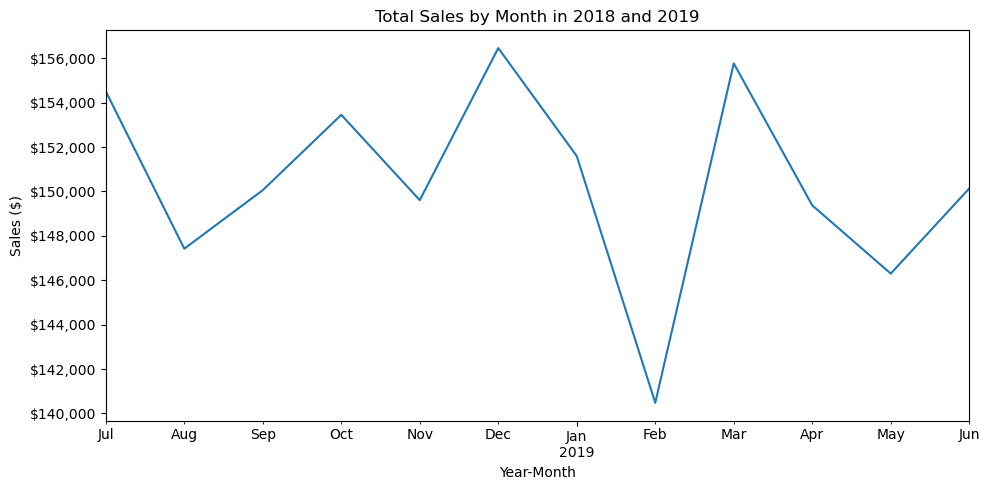

In [68]:
monthly_sales = store_merged_df.groupby(
    store_merged_df['DATE'].dt.to_period('M') # group by month
)['TOT_SALES'].sum()
monthly_sales.plot(kind='line', figsize=(10, 5))
plt.title('Total Sales by Month in 2018 and 2019')
plt.ylabel('Sales ($)')
plt.xlabel('Year-Month')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.tight_layout()
plt.plot()

Monthly Sales Analysis

* Monthly sales from July 2018 to June 2019 fluctuated between $140,000 and $156,000, an approximate 10% variation. This reflects a stable financial performance throughout the year. Sales peaked in December, likely due to seasonal demand, which presents an opportunity for holiday promotions.
* The lowest sales occurred in February, potentially due to reduced demand following high volume holiday purchases. This is confirmed as March had the second highest monthly sale, likely to mass restock after finishing remaining supplies in February.
* The graph reveals an alternating monthly sales pattern, where peaks are followed by dips, likely due to typical consumer restocking behavior. This pattern is common in grocery retail, where high-purchase months are followed by lower ones as customers use up their inventory. To avoid overstocking and reduce volatility, bundling or targeted promotions during slower months could help drive steady revenue.
* Overall, the consistent monthly range indicates steady and predictable market demand, offering a strong foundation for category planning and future promotional strategies.

Customer demographic Metrics Grouped by Stores:
- Average Sales Per Customer: TOT_SALES / Unique Customers, used to show individual revenue
- Transaction by Lifestage, and Premium Customer: Used to determine shopper identity and who the most valuable customers are

In [138]:
avg_sales_per_customer = store_merged_df.groupby("STORE_NBR").agg({
    "TOT_SALES": "sum",
    "LYLTY_CARD_NBR": "nunique"
})
avg_sales_per_customer["AVG_SALES_PER_CUSTOMER"] = (
    avg_sales_per_customer["TOT_SALES"] / avg_sales_per_customer["LYLTY_CARD_NBR"]
)
avg_sales_per_customer["PREMIUM_CUSTOMER"] = store_merged_df["PREMIUM_CUSTOMER"]
avg_sales_per_customer

,TOT_SALES,LYLTY_CARD_NBR,AVG_SALES_PER_CUSTOMER,PREMIUM_CUSTOMER
STORE_NBR,,,,
1,2223.90,332,6.698494,Mainstream
2,1854.00,298,6.221477,Budget
3,12149.65,362,33.562569,Budget
4,13709.25,378,36.267857,Mainstream
5,8802.20,237,37.140084,Mainstream
...,...,...,...,...
268,2421.85,321,7.544704,Budget
269,10470.70,251,41.715936,Premium
270,10519.05,243,43.288272,Mainstream


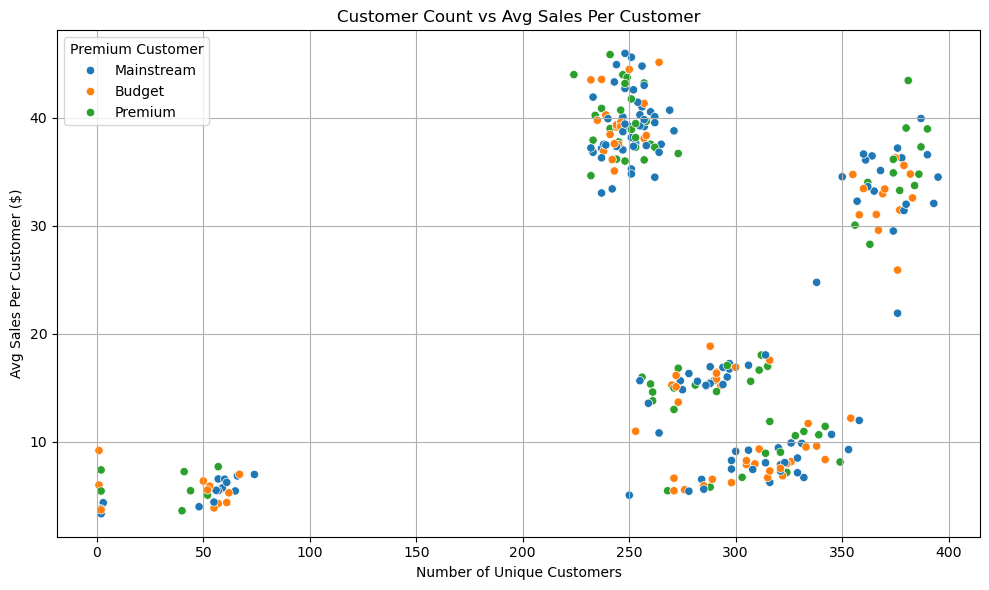

In [139]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=avg_sales_per_customer,
    x="LYLTY_CARD_NBR", 
    y="AVG_SALES_PER_CUSTOMER", 
    hue="PREMIUM_CUSTOMER",
    palette="tab10", 
)
plt.title("Customer Count vs Avg Sales Per Customer")
plt.xlabel("Number of Unique Customers")
plt.ylabel("Avg Sales Per Customer ($)")
plt.grid(True)
plt.legend(title="Premium Customer")
plt.tight_layout()
plt.show()


Customer Count vs Average Sales Analysis
- A small portion of stores (~10) have a single-digit number of unique customers, suggesting these locations are likely closed or non-operational and should be excluded from further analysis.
- Another small portions of stores have around 40 - 70 unique customers with fairly low average sales per customers, these stores may be located in more rural regions. One potential option could be offering value based promotion, such as discounting items near expiration date to encourage more frequent purchases. 
- The majority of stores seem to between 220 - 400 unique customers with varying average sales. The store seems to be seperated into 3 main categories by Average Sales Per Customer
1. $45 - $30: These stores serve many premium and mainstream customers, who are likely to purchase larger or more expensive items. Surprisingly, budget shoppers are still present in this group, to a lesser extent. Most stores have either ~250 or ~350-400 unique customers, suggesting either a wealthier customer base or larger stores.
2. $30 - $15: This store still lean towards premium and mainstream customers, surprisingly having a smaller portion of customer base as budget customers. This is likely due to budget customers preferring the cheaper alternatives, even if it means to sacrafice quality. Least stores are within this region, indicating customers often preferring the two extremes.
3. Less than $15: These stores have a fairly even distribution of customer base, though prefering budget customers. These stores attract between 250-350 unique customers, indicating a consistent customer base despite lower average revenue.

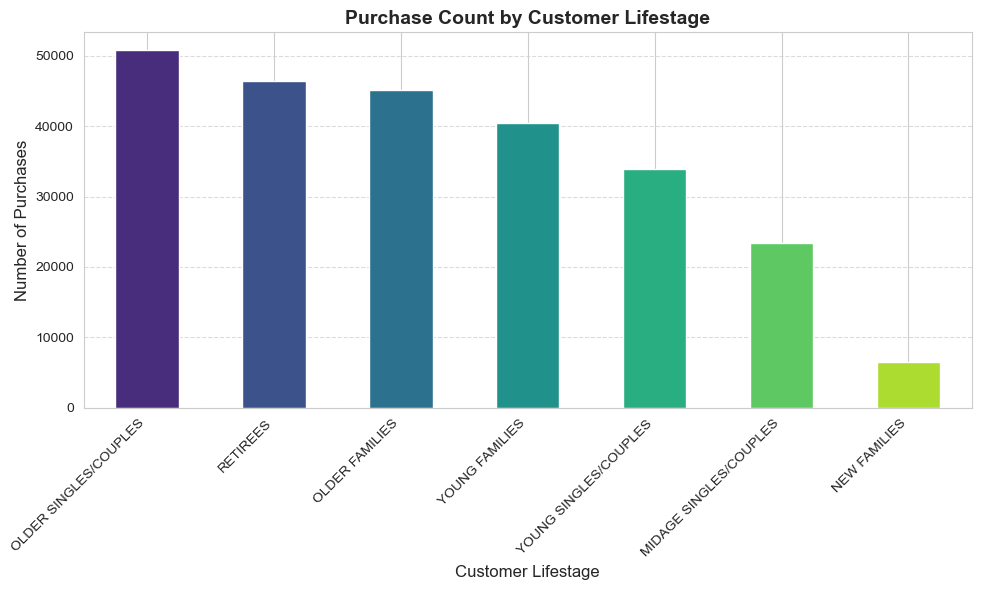

In [148]:
sns.set_style("whitegrid")

customer_lifestage = store_merged_df.groupby("LIFESTAGE")["LYLTY_CARD_NBR"].count().sort_values(ascending=False)
plt.figure(figsize=(10,6))
bars = customer_lifestage.plot(kind="bar", color=sns.color_palette("viridis", len(customer_lifestage)))
plt.title('Purchase Count by Customer Lifestage', fontsize=14, weight='bold')
plt.xlabel('Customer Lifestage', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.legend().remove()
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [150]:
customer_quartile_df = store_merged_df.copy()
customer_quartile_df["PRICE_QUARTILE"] = pd.qcut(customer_quartile_df["PROD_PRICE_$"], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
customer_quartile_df["WEIGHT_QUARTILE"] = pd.qcut(customer_quartile_df["PROD_WEIGHT_G"], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
customer_quartile_df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,PROD_PRICE_$,PROD_WEIGHT_G,PRICE_QUARTILE,WEIGHT_QUARTILE
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018,10,3.0,175,Q1,Q3
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2018,9,2.7,150,Q1,Q1
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,2019,3,3.6,210,Q2,Q4
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,2019,3,3.0,175,Q1,Q3
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,2018,11,1.9,160,Q1,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2370651,MIDAGE SINGLES/COUPLES,Mainstream,2018-08-03,88,240350,4,Dorito Corn Chp Supreme 380g,2,13.0,2018,8,6.5,380,Q4,Q4
246736,2370701,YOUNG FAMILIES,Mainstream,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,2018,12,3.6,210,Q2,Q4
246737,2370751,YOUNG FAMILIES,Premium,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,2018,10,4.6,150,Q3,Q1
246738,2370961,OLDER FAMILIES,Budget,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,2018,10,4.2,165,Q3,Q2


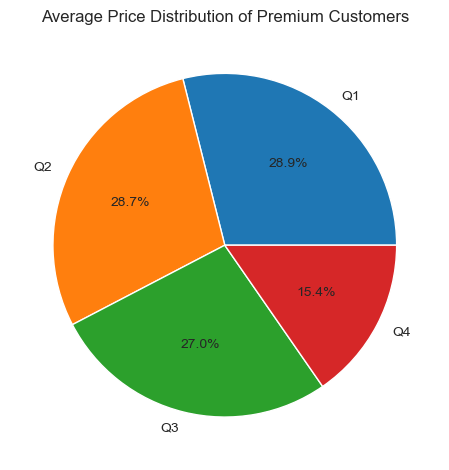

In [156]:
customer_quartile_df_average_price = customer_quartile_df["PRICE_QUARTILE"].value_counts().copy()
customer_quartile_df_average_price.plot(
    kind="pie",
    autopct='%1.1f%%',
    ylabel=''
)
plt.title("Average Price Distribution of Premium Customers")
plt.tight_layout()
plt.show()

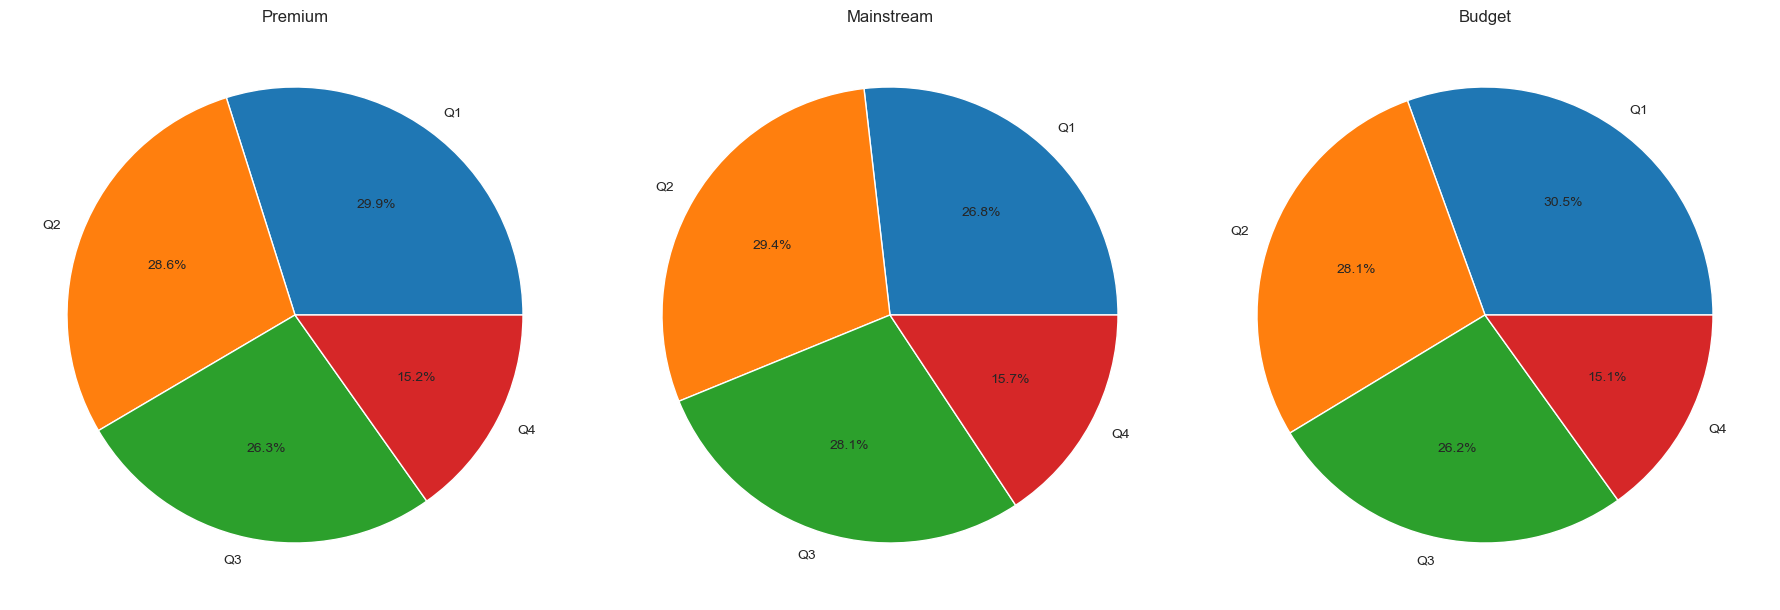

In [157]:
customer_quartile_df_customers = customer_quartile_df.groupby("PREMIUM_CUSTOMER")
customer_quartile_df_customers = customer_quartile_df_customers["PRICE_QUARTILE"].value_counts()
customer_quartile_df_customers_unstack = customer_quartile_df_customers.unstack()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
segments = customer_quartile_df["PREMIUM_CUSTOMER"].unique()
for i, segment in enumerate(segments):
    data = customer_quartile_df[customer_quartile_df["PREMIUM_CUSTOMER"] == segment]["PRICE_QUARTILE"].value_counts().sort_index()
    data.plot(
        kind='pie',
        autopct='%1.1f%%',
        ylabel='',
        ax=axes[i],
        title=segment
    )
plt.tight_layout()
plt.show()

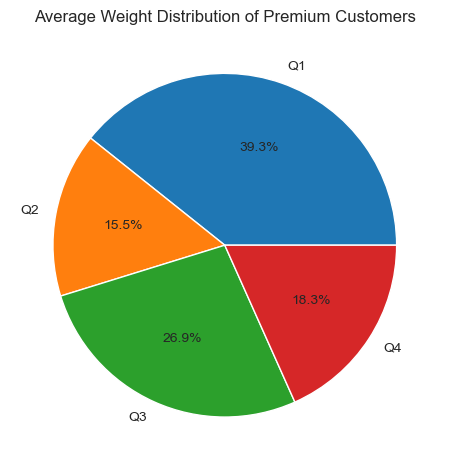

In [154]:
customer_quartile_df_average_weight = customer_quartile_df["WEIGHT_QUARTILE"].value_counts().sort_index().copy()
customer_quartile_df_average_weight.plot(
    kind="pie",
    autopct='%1.1f%%',
    ylabel=''
)
plt.title("Average Weight Distribution of Premium Customers")
plt.tight_layout()
plt.show()

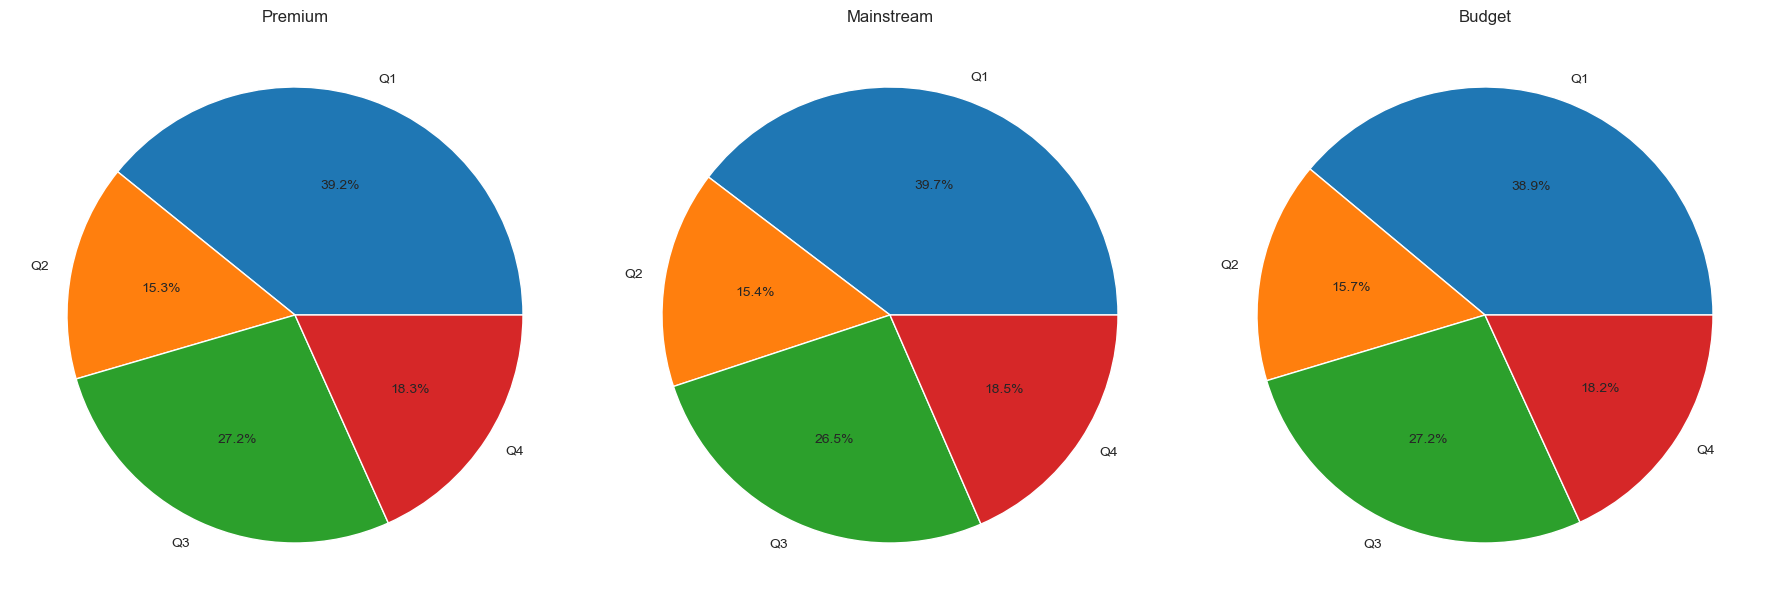

In [155]:
customer_quartile_df_customers = customer_quartile_df.groupby("PREMIUM_CUSTOMER")
customer_quartile_df_customers = customer_quartile_df_customers["WEIGHT_QUARTILE"].value_counts()
customer_quartile_df_customers_unstack = customer_quartile_df_customers.unstack()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
segments = customer_quartile_df["PREMIUM_CUSTOMER"].unique()
for i, segment in enumerate(segments):
    data = customer_quartile_df[customer_quartile_df["PREMIUM_CUSTOMER"] == segment]["WEIGHT_QUARTILE"].value_counts().sort_index()
    data.plot(
        kind='pie',
        autopct='%1.1f%%',
        ylabel='',
        ax=axes[i],
        title=segment
    )
plt.tight_layout()
plt.show()

Price vs Weight Distrbution Analysis

Price Distribution
* The price distribution is evenly distributed among customer's premium status. All customers show similar purchasing behavior when segmented by price quartiles.
* Even premium customers, typically assumed to prioritize quality over cost, demonstrate similarly toward value.
* These findings imply that price sensitivity is a general trend among all customer types, not just budget conscious ones. Future promotions could focus on highlighting value, even for higher tier items.

Weight Distribution
* The weight distribution is evenly distributed among customer's premium status. All customers have similar purchasing behavior when segmented by weight quartiles.
* The largest distribution of items sold are the lightest items. From previous observations, these items are smaller snacks which are cheaper and easily consumable.
* Products that are slightly below average (Q2) are the least purchased. This may be caused by higher price, too small to share with a group, or too much for a single person to purchase. This trend suggests that the store manager should either purchase items that are smaller in size or larger.